## Applying Random Forest Regressor

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
import matplotlib as mpl
from scipy.stats import pearsonr

In [3]:
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
particle_data = pd.read_csv('/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/FlowCam Ti64 Powders/FlowCamTi64.csv')#
particle_data = particle_data.loc[(particle_data['Diameter (ABD) (µm)'] >= 40) & (particle_data['Diameter (ABD) (µm)'] <= 100)]
particle_data = particle_data.dropna()
particle_data.columns

Index(['Unnamed: 0', 'Name', 'Area (ABD) (µm²)', 'Area (Filled) (µm²)',
       'Aspect Ratio', 'Average Blue', 'Average Green', 'Average Red',
       'Biovolume (Cylinder) (µm³)', 'Biovolume (P. Spheroid) (µm³)',
       'Biovolume (Sphere) (µm³)', 'Calibration Factor', 'Calibration Image',
       'Capture ID', 'Capture X (px)', 'Capture Y (px)', 'Ch1 Area',
       'Ch1 Peak', 'Ch1 Width', 'Ch2 Area', 'Ch2 Peak', 'Ch2 Width',
       'Ch2/Ch1 Ratio', 'Circle Fit', 'Circularity', 'Circularity (Hu)',
       'Compactness', 'Convex Perimeter (µm)', 'Convexity', 'Date',
       'Diameter (ABD) (µm)', 'Diameter (ESD) (µm)', 'Diameter (FD) (µm)',
       'Edge Gradient', 'Elapsed Time (s)', 'Elongation',
       'Feret Angle Max (°)', 'Feret Angle Min (°)', 'Fiber Curl',
       'Fiber Straightness', 'Filter Score', 'Geodesic Aspect Ratio',
       'Geodesic Length (µm)', 'Geodesic Thickness (µm)', 'Group ID',
       'Image Height (px)', 'Image Width (px)', 'Intensity', 'Length (µm)',
       'Partic

In [50]:
X = particle_data['Rev']
y = particle_data['Circularity']

corr, _ = pearsonr(X, y)
print(corr)

0.030014437442991655


Pearson Correlation Coefficient: 0.2085318894068361
Dimensions of y: (31273,)
Dimensions of X: (31273, 4)


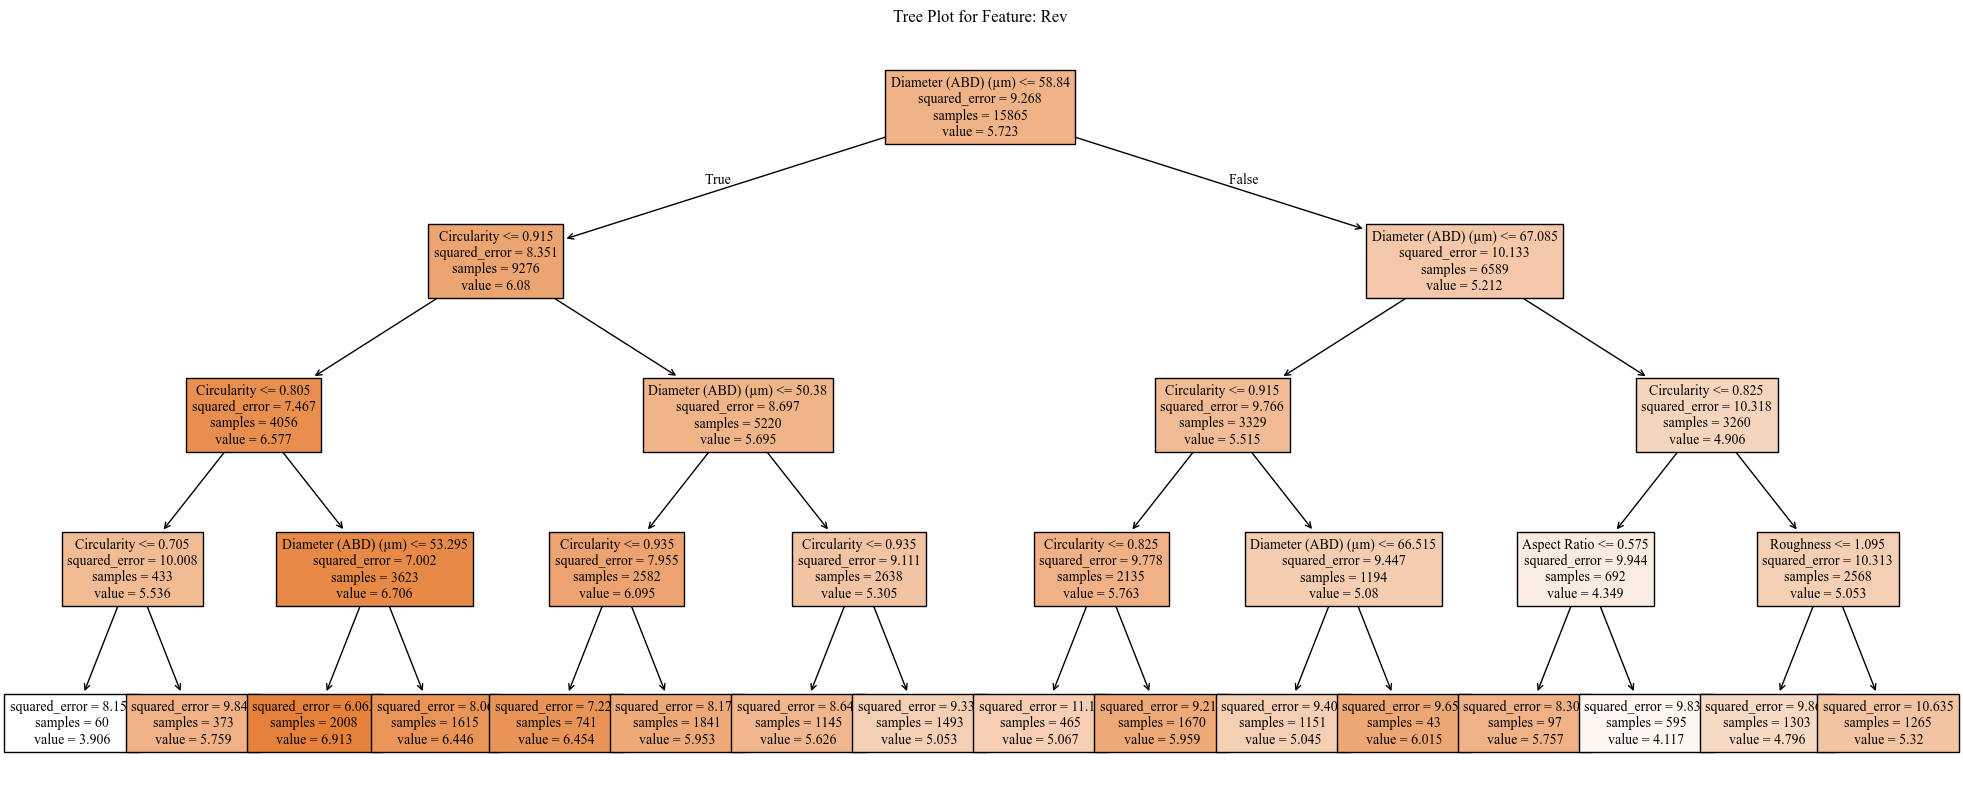

In [5]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest Model and Data Preparation
rf = RandomForestRegressor(random_state=4400,max_depth=4)
features = ['Circularity', 'Diameter (ABD) (µm)', 'Aspect Ratio', 'Roughness']
X = particle_data[features] 
y = particle_data['Rev']  

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4400)

# fit model and predict 
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

pearson_corr, _ = pearsonr(y_test, y_pred)
print(f"Pearson Correlation Coefficient: {pearson_corr}")
print("Dimensions of y:", y.shape)
print("Dimensions of X:", X.shape)

fig, ax = plt.subplots(figsize=(25, 10))

plot_tree(
    rf.estimators_[0], 
    ax=ax, 
    filled=True, 
    feature_names=features,
    fontsize=10,      # Increase font size
)
plt.title(f"Tree Plot for Feature: {'Rev'}")
plt.show()

(0.0, 10.0)

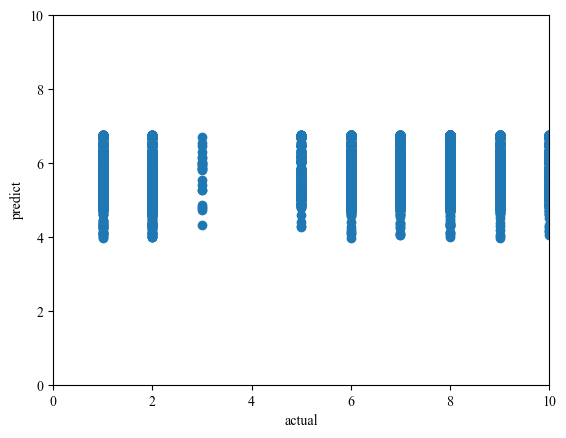

In [7]:
plt.scatter(y_test, y_pred)
plt.xlabel('actual')
plt.ylabel('predict')
plt.xlim(0,10)
plt.ylim(0,10)

In [52]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def randomforestregressor(particle_data, targets, features):
    result_list = []
    X = particle_data[features]

    for target in targets:
        if particle_data[target].isna().all():
            continue
        
        # Initialize random forest regressor 
        rf = RandomForestRegressor(random_state=4400)
        
        # calculation using deviation
        #target_mean = particle_data[target].mean()
        #y = abs(particle_data[target] - target_mean) 

        y = particle_data[[target]].values.ravel()

        # Split data into test and training 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4400)
        
        # Fit and predict 
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)

        # Calculate MSE
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Calculate average and standard deviation
        avg_value = particle_data[target].mean()
        std_value = particle_data[target].std()

        # Append results to the list
        result_list.append({
            'Feature': target,
            'Average': avg_value,
            'Standard Deviation': std_value,
            'MSE': mse,
            'R2': r2
        })

        # Plot a tree for visualization
        fig, ax = plt.subplots(figsize=(12, 8))
        plot_tree(rf.estimators_[0], ax=ax, filled=True, feature_names=features)
        plt.title(f"Tree Plot for Feature: {target}")
        plt.show()

    # Create a result table
    result_table = pd.DataFrame(result_list)
    pd.set_option('display.float_format', '{:.6f}'.format)

    return result_table



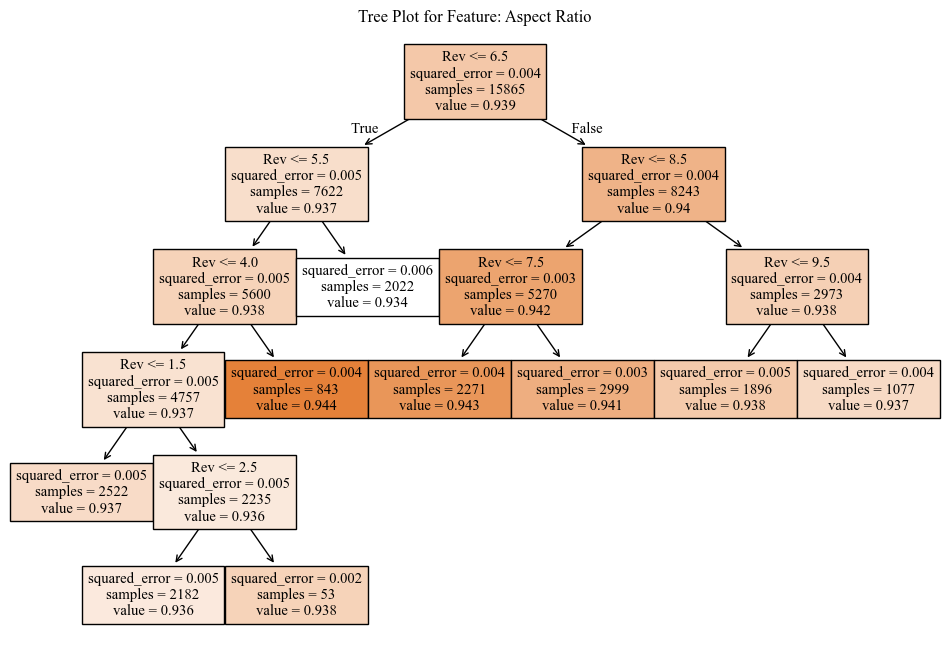

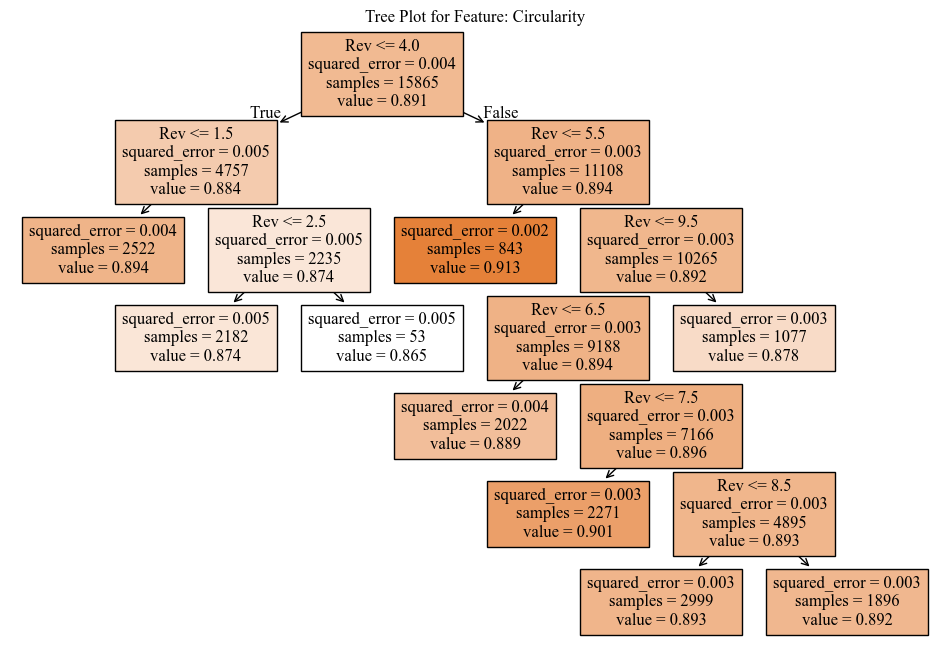

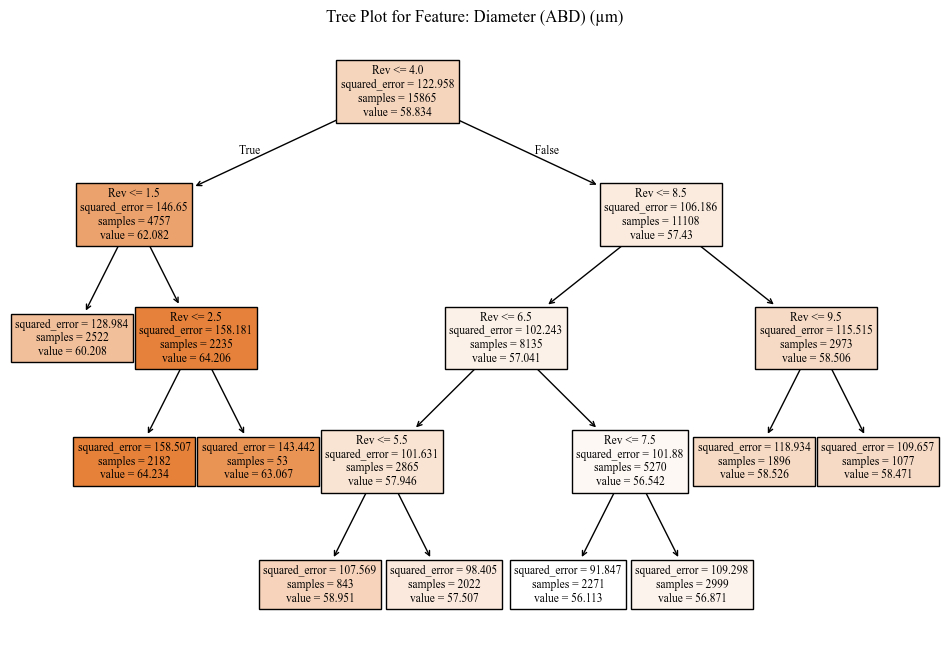

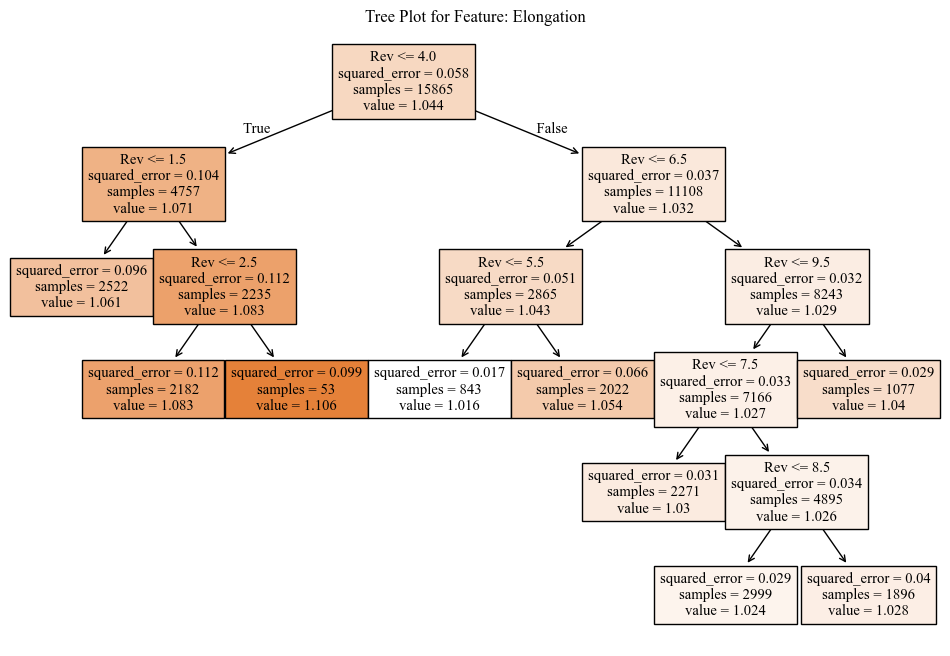

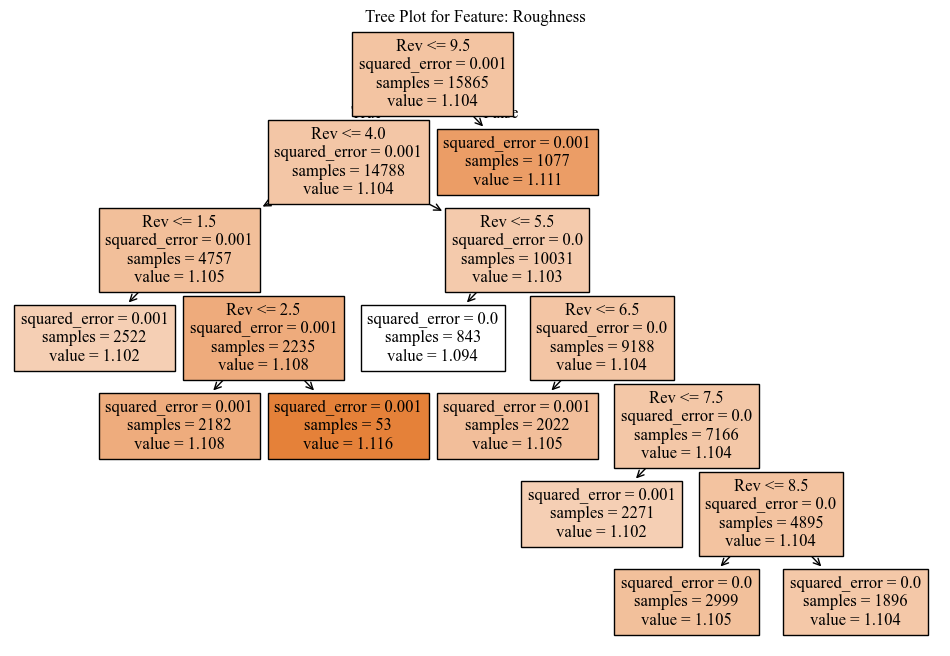

,Feature,Average,Standard Deviation,MSE,R2
0,Aspect Ratio,0.937930,0.067361,0.004537,0.001051
1,Circularity,0.890979,0.060871,0.003444,0.025843
2,Diameter (ABD) (µm),58.886735,11.087042,115.137985,0.042991
3,Elongation,1.045463,0.244945,0.047804,0.002995
4,Roughness,1.104347,0.024966,0.000525,0.021279


In [53]:
features = ['Rev']
targets = ['Aspect Ratio','Circularity',
       'Diameter (ABD) (µm)', 'Elongation', 'Roughness']
rf = randomforestregressor(particle_data, targets=targets, features=features)
rf

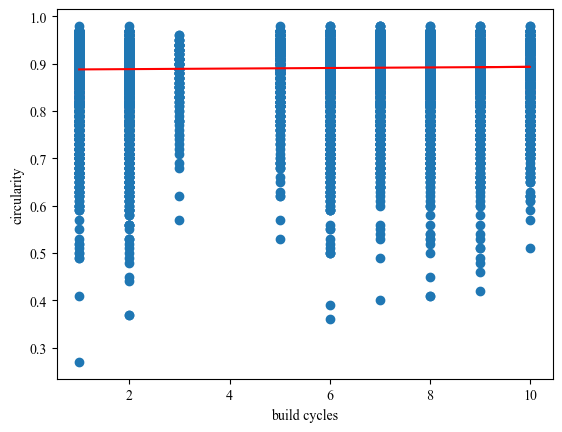

0.0006



In [54]:
plt.scatter(particle_data['Rev'],particle_data['Circularity'])
plt.xlabel('build cycles')
plt.ylabel('circularity')

slope, intercept = np.polyfit(particle_data['Rev'], particle_data['Circularity'], 1)

slope = round(slope, 4)
intercept = round(intercept, 4)

trend_line = slope * particle_data['Rev'] + intercept
plt.plot(particle_data['Rev'], trend_line, color='red', label='Trend Line')



plt.show()

print(slope)
print()

In [75]:
particle_data = pd.read_csv('/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/FlowCam Ti64 Powders/FlowCamTi64.csv')#
particle_data = particle_data.loc[(particle_data['Diameter (ABD) (µm)'] >= 40) & (particle_data['Diameter (ABD) (µm)'] <= 100)]
particle_data = particle_data.dropna()
particle_data
# figure 7 and 8 bar graphs 

stats = particle_data.groupby("Rev")["Diameter (ABD) (µm)"].agg(["mean", "std"]).reset_index()
stats.rename(columns={"mean": "Avg", "std": "Std Dev"}, inplace=True)

stats

,Rev,Avg,Std Dev
0,1,60.181765,11.310276
1,2,64.351829,12.383036
2,3,63.814537,12.095453
3,5,58.566534,10.333389
4,6,57.784663,10.037772
5,7,56.410417,9.711953
6,8,56.862148,10.343682
7,9,58.573289,11.152470
8,10,58.304243,10.587541


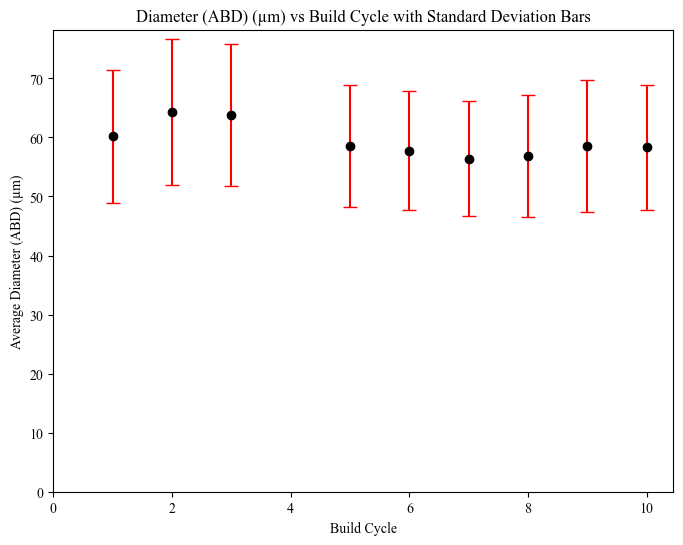

In [78]:
# Plot
plt.figure(figsize=(8, 6))
plt.errorbar(
    stats["Rev"],
    stats["Avg"],
    yerr=stats["Std Dev"],
    fmt='o',  # Circle markers with lines
    capsize=5,  # Error bar caps
    color='black',
    ecolor='r',  # Error bar color
    label='Average Roughness'
)

plt.title("Diameter (ABD) (µm) vs Build Cycle with Standard Deviation Bars")
plt.xlabel("Build Cycle")
plt.ylabel("Average Diameter (ABD) (µm)")
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()
